In [198]:
!pip install kaggle
!pip install pandas
!pip install graphviz
!pip3 install pydotplus
!pip install webcolors
!pip install colour
!pip install prettytable
!pip3 install matplotlib
import os
import zipfile
import kaggle

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [199]:
#{"username":"anguis1","key":"8e5aa869bd2b736636371bd2e59902b3"}

os.environ['KAGGLE_USERNAME'] = 'anguis1'
os.environ['KAGGLE_KEY'] = '8e5aa869bd2b736636371bd2e59902b3'

#Nom du dataset
dataset = "vishalsubbiah/pokemon-images-and-types"

#Téléchargement du Dataset
kaggle.api.dataset_download_files(dataset)

with zipfile.ZipFile('pokemon-images-and-types.zip', 'r') as zip_ref:
    zip_ref.extractall('pokemon')

In [200]:
import urllib.request
import json
import pandas as pd

#On charge le fichier csv
df = pd.read_csv('./pokemon/pokemon.csv')

#On crée un dictionnaire associant le nom du pokemon à son image
pokemon_images = {}
for filename in os.listdir("./pokemon/images/images"):
    if filename.endswith(".png"):
        name = filename.split(".")[0]
        pokemon_images[name] = os.path.join("pokemon/images/images", filename)

# Ajouter une colonne "image" au dataframe
df["image"] = df["Name"].apply(lambda x: pokemon_images.get(x, None))

# Supprimer les lignes sans image
df = df.dropna(subset=["image"])

# Afficher le dataframe
print(df.head())

         Name  Type1   Type2                                 image
0   bulbasaur  Grass  Poison   pokemon/images/images/bulbasaur.png
1     ivysaur  Grass  Poison     pokemon/images/images/ivysaur.png
2    venusaur  Grass  Poison    pokemon/images/images/venusaur.png
3  charmander   Fire     NaN  pokemon/images/images/charmander.png
4  charmeleon   Fire     NaN  pokemon/images/images/charmeleon.png


In [201]:
import numpy as np
from sklearn.cluster import KMeans

def get_dominant_colors(image_path, n_colors):
    
    #Définir explicitement n_init pour éviter l'avertissement de version future
    n_init = 'auto'
    
    # Charger l'image et la convertir en une matrice numpy
    img = Image.open(image_path)
    img = np.array(img)

    # Obtenir un tableau de pixels en deux dimensions
    pixels = img.reshape(-1, 3)
    #-1 car l'argument s'adapte à la taille de l'image et 3 pour le RGB
    
    # Créer un objet de clustering
    kmeans = KMeans(n_clusters=n_colors, n_init=n_init)

    # Entraîner le modèle
    kmeans.fit(pixels)

    # Récupérer les couleurs dominantes
    dominant_colors = kmeans.cluster_centers_

    # Convertir les couleurs en entiers et les ajouter à une liste
    dominant_colors = [tuple(map(int, color)) for color in dominant_colors]
    
    return dominant_colors

In [202]:
def rgb_to_hex(rgb):
    #Convertir les valeurs RGB en valeurs hexadécimales
    hex_color = '#{:02x}{:02x}{:02x}'.format(int(rgb[0]), int(rgb[1]), int(rgb[2]))
    return hex_color

In [203]:
def rgb_to_hex_list(image_path, n_colors):
    
    #Fonction permettant de convertir une couleur rgb (liste de 3 valeurs) en une valeur hexadécimale
    
    dominant_colors = get_dominant_colors(image_path, n_colors)
    
    #Convertir la liste de couleurs RGB en liste de couleurs hexadécimales
    hex_list = [rgb_to_hex(rgb) for rgb in dominant_colors]
    return hex_list

In [204]:
import webcolors
from colour import Color

def hex_to_color_name(requested_color):
    # Convertir la couleur en un objet Color
    try:
        requested_color = Color(requested_color)
    except:
        raise ValueError(f"La valeur hexadécimale '{requested_color}' n'est pas valide.")
    
    # Trouver la couleur la plus proche dans la liste des noms de couleurs prédéfinis
    closest_color = None
    min_colors = {}
    for key, name in webcolors.CSS3_HEX_TO_NAMES.items():
        try:
            # Convertir la couleur prédéfinie en un objet Color
            color = Color(key)
            
            # Calculer la distance entre les deux couleurs en utilisant la différence Euclidienne
            r_distance = (requested_color.red - color.red) ** 2
            g_distance = (requested_color.green - color.green) ** 2
            b_distance = (requested_color.blue - color.blue) ** 2
            distance = r_distance + g_distance + b_distance
            
            # Garder la distance minimale pour chaque couleur prédéfinie
            if distance not in min_colors:
                min_colors[distance] = name
        except ValueError:
            # Ignorer les couleurs prédéfinies qui ne peuvent pas être converties en objet Color
            pass
    
    # Retourner la couleur prédéfinie ayant la distance minimale à la couleur demandée
    closest_color = min_colors[min(min_colors.keys())]
    return closest_color


In [205]:
from PIL import Image
def show_image(filename):
    #fonction pour afficher les images
    folder_path = './pokemon/images/images'
    filepath = os.path.join(folder_path, filename)
    with Image.open(filepath) as img:
        display(img)

In [367]:
import random

def create_user_profile(nb_users):
        # Créer une liste avec des couleurs simples
    choice_color = ["green","blue","red","purple","yellow","orange","cyan","olive","brown","white","black","gray"]
    # Créer une liste de tous les types de pokemon valides
    choice_type=["Normal", "Fight", "Flying", "Poison", "Ground", "Rock", "Bug", "Ghost", "Steel",
                 "Fire", "Water", "Grass", "Electric", "Psychic", "Ice", "Dragon", "Dark", "Fairy"]
    #Dictionnaire contenant les profiles des utilisateurs
    dico_users={}
    for user in range(nb_users):
        dico_users['favorite_utilisateur'+str(user+1)]={
        "color" : random.choice(choice_color),
        "color_tier" : random.randint(1,4),
        "primary_type" : random.choice(choice_type),
        "secondary_type" : random.choice(choice_type),
        "image_size" : random.randint(2000,5000),
        "answer_type" : random.randint(0,3) 
        }
    return dico_users

In [368]:

def satisfied_or_not(dico,kmeans_hex_list,type1,type2,size):
    #Fonction pour générer soit un avis aléatoire (positif ou négatif) de l'utilisateur pour pouvoir effectuer des tests

    #4 type de réponse pour chaque utilisateur
    answer1="Yes" if dico["color"] in hex_to_color_name(kmeans_hex_list[dico["color_tier"]
            ]) or dico["primary_type"] in type1 or dico["secondary_type"
            ] in type2 or dico["image_size"]<=size else "No"
    answer2="Yes" if dico["color"] in hex_to_color_name(kmeans_hex_list[1
            ]) or dico["color"] in hex_to_color_name(kmeans_hex_list[2
            ]) and dico["primary_type"] in type1 or dico["secondary_type"
            ] in type2 and dico["image_size"]<=size else "No"
    answer3="Yes" if dico["primary_type"] in type1 or dico["secondary_type"] in type2 else "No"
    answer4="Yes" if dico["color"] in hex_to_color_name(kmeans_hex_list[dico["color_tier"]]) else "No"
    answer_list=[answer1,answer2,answer3,answer4]
    answer=answer_list[dico["answer_type"]]
    return answer

In [ ]:
import os
import csv
import json
import random
from PIL import Image
# Chemin du dossier contenant les images
folder_path = './pokemon/images/images'

# Liste des extensions de fichier que nous voulons inclure dans l'analyse
extensions = ['.jpg', '.jpeg', '.png']

# Initialisation de la liste pour stocker les informations de chaque image
list_images_info = []
# Initialisation du dictionnaire contenant les profils aléatoires des utilisateurs
dico_users=create_user_profile(4)
print(dico_users)
# Ouverture du fichier CSV
with open('./pokemon/pokemon.csv') as csv_file:
    csv_reader = csv.reader(csv_file)
    next(csv_reader) # Ignorer la première ligne (en-tête)
    for row in csv_reader:
        # Récupère les informations du CSV
        pokemon_name = row[0]
        type1 = row[1]
        try :
            type2 = row[2]
        except Exception as e:
            type2 = 'None'
        # Vérifie si le fichier est une image avec une extension spécifiée
        if any(filename.lower().endswith(ext) for ext in extensions):
            filename = row[0]+'.png'
            filepath = os.path.join(folder_path, filename)
            if not os.path.isfile(filepath):
                filename = row[0]+'.jpg'
                filepath = os.path.join(folder_path, filename)


            # Ouvre l'image avec PIL
            with Image.open(filepath) as img:

                #On calcule les kmeans de l'image
                kmeans_hex_list = rgb_to_hex_list(filepath, 5)

                # Stocke les informations dans un dictionnaire
                images_info = {'filename': filename,
                               'pokemon_name': pokemon_name,
                               'type1': type1,
                               'type2': type2,
                               'size': str(os.path.getsize(filepath)),
                               'k-means_region_one' : hex_to_color_name(kmeans_hex_list[1]),
                               'k-means_region_two' : hex_to_color_name(kmeans_hex_list[2]),
                               'k-means_region_three' : hex_to_color_name(kmeans_hex_list[3]),
                               'k-means_region_four' : hex_to_color_name(kmeans_hex_list[4]),
                               'favorite_utilisateur1': satisfied_or_not(dico_users['favorite_utilisateur1'],kmeans_hex_list,type1,type2,os.path.getsize(filepath)),
                               'favorite_utilisateur2': satisfied_or_not(dico_users['favorite_utilisateur2'],kmeans_hex_list,type1,type2,os.path.getsize(filepath)),
                               'favorite_utilisateur3': satisfied_or_not(dico_users['favorite_utilisateur3'],kmeans_hex_list,type1,type2,os.path.getsize(filepath)),
                               'favorite_utilisateur4': satisfied_or_not(dico_users['favorite_utilisateur4'],kmeans_hex_list,type1,type2,os.path.getsize(filepath))}
                # Ajoute le dictionnaire à la liste
                list_images_info.append(images_info)
# Écriture du résultat dans un fichier JSON
with open('images_info.json', 'w') as json_file:
    json.dump(list_images_info, json_file)

{'favorite_utilisateur1': {'color': 'yellow', 'color_tier': 3, 'primary_type': 'Dark', 'secondary_type': 'Dark', 'image_size': 3133, 'answer_type': 1}, 'favorite_utilisateur2': {'color': 'orange', 'color_tier': 2, 'primary_type': 'Bug', 'secondary_type': 'Flying', 'image_size': 4584, 'answer_type': 1}, 'favorite_utilisateur3': {'color': 'cyan', 'color_tier': 2, 'primary_type': 'Dark', 'secondary_type': 'Psychic', 'image_size': 4826, 'answer_type': 3}, 'favorite_utilisateur4': {'color': 'brown', 'color_tier': 2, 'primary_type': 'Bug', 'secondary_type': 'Electric', 'image_size': 3125, 'answer_type': 0}}


In [ ]:
def user_decision_tree_show(user_tree):
    #Focntion qui affiche l'arbre de decision pour un certain utilisateur
    dot_data = tree.export_graphviz(user_tree, out_file=None,
          feature_names=dataframe.columns,
          filled=True, rounded=True, 
          class_names =True
         ) 
    graph = graphviz.Source(dot_data) 
    pydot_graph = pydotplus.graph_from_dot_data(dot_data)
    img = Image(pydot_graph.create_png())
    display(img)

In [ ]:
from sklearn import tree
from sklearn import metrics
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import graphviz
import pydotplus
from IPython.display import Image, display

#We read the json file and create the dataframes
with open('./images_info.json') as d:
    file_contents = d.read()
data = json.loads(file_contents)
datadict={}
resultdict={}

favorite_all=[]

favorite=["favorite_utilisateur1","favorite_utilisateur2","favorite_utilisateur3","favorite_utilisateur4"]
for keyi in data[0].keys(): 
    if keyi not in favorite_all:
        if keyi in favorite:
            resultdict[keyi]=[]
        else:
            datadict[keyi]=[]

for dicti in data:
    for keyi in dicti.keys():
        if keyi not in favorite_all:
            if keyi in favorite:
                resultdict[keyi].append(dicti[keyi])
            else:
                datadict[keyi].append(dicti[keyi])
                


#creating dataframes
dataframe = pd.DataFrame(datadict)
resultframe=pd.DataFrame(resultdict)


print(dataframe)
print(resultframe)


#generating numerical labels for database and users
le1 = LabelEncoder() #On associe un chiffre avec le texte du tag
dataframe['filename'] = le1.fit_transform(dataframe['filename'])

le2 = LabelEncoder()
dataframe['pokemon_name'] = le2.fit_transform(dataframe['pokemon_name'])

le3 = LabelEncoder()
dataframe['type1'] = le3.fit_transform(dataframe['type1'])

le4 = LabelEncoder()
dataframe['type2'] = le4.fit_transform(dataframe['type2'])

le5 = LabelEncoder() #On associe un chiffre avec le texte du tag
dataframe['size'] = le5.fit_transform(dataframe['size'])

le6 = LabelEncoder()
dataframe['k-means_region_one'] = le6.fit_transform(dataframe['k-means_region_one'])

le7 = LabelEncoder()
dataframe['k-means_region_two'] = le7.fit_transform(dataframe['k-means_region_two'])

le8 = LabelEncoder()
dataframe['k-means_region_three'] = le8.fit_transform(dataframe['k-means_region_three'])

le9 = LabelEncoder()
dataframe['k-means_region_four'] = le9.fit_transform(dataframe['k-means_region_four'])

le10 = LabelEncoder()
resultframe['favorite_utilisateur1'] = le10.fit_transform(resultframe['favorite_utilisateur1'])
resultframe['favorite_utilisateur2'] = le10.fit_transform(resultframe['favorite_utilisateur2'])
resultframe['favorite_utilisateur3'] = le10.fit_transform(resultframe['favorite_utilisateur3'])
resultframe['favorite_utilisateur4'] = le10.fit_transform(resultframe['favorite_utilisateur4'])

"""
Use of decision tree classifiers. 
We're doing supervised training, so the algorithm is trained on only half of the database.
The other half is used later to check the precision of the prediction algorithm
"""

#Decision Tree for user 1
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(dataframe[:int(len(dataframe.index)/2)], resultframe['favorite_utilisateur1'][:int(len(resultframe.index)/2)])

#Decision Tree for user 2
dtc2 = tree.DecisionTreeClassifier()
dtc2 = dtc2.fit(dataframe[:int(len(dataframe.index)/2)], resultframe['favorite_utilisateur2'][:int(len(resultframe.index)/2)])

#Decision Tree for user 3
dtc3 = tree.DecisionTreeClassifier()
dtc3 = dtc3.fit(dataframe[:int(len(dataframe.index)/2)], resultframe['favorite_utilisateur3'][:int(len(resultframe.index)/2)])

#Decision Tree for user 4
dtc4 = tree.DecisionTreeClassifier()
dtc4 = dtc4.fit(dataframe[:int(len(dataframe.index)/2)], resultframe['favorite_utilisateur4'][:int(len(resultframe.index)/2)])

print("Utilisateur1 favorite")
user_decision_tree_show(dtc)
print("Utilisateur2 favorite")
user_decision_tree_show(dtc2)
print("Utilisateur3 favorite")
user_decision_tree_show(dtc3)
print("Utilisateur4 favorite")
user_decision_tree_show(dtc4)

In [372]:
def predict_favorite(id,user_tree):
    if le10.inverse_transform(user_tree.predict(dataframe[id:id+1]))==['Yes']:
        return True
    return False


In [373]:
def recommend(user_tree):
    recommendation_list=[]
    for id in range(int(len(dataframe.index)/2),len(dataframe.index)):
        if predict_favorite(id,user_tree):
            recommendation_list.append(dataframe.loc[id]["filename"])
    return le1.inverse_transform(recommendation_list)

In [374]:
from PIL import Image
def User_recommendations(user_tree,user):
    print("-----------------------------------------------------------------------")
    print("Acuracy: ", metrics.accuracy_score(resultframe[user][int(len(resultframe.index)/2):], user_tree.predict(dataframe[int(len(dataframe.index)/2):])))
    print("Feature importance: ",user_tree.feature_importances_)
    recommendation_list=recommend(user_tree)
    print("-->",len(recommendation_list)," recommendations pour ",user," : ",recommendation_list)
    for image in recommendation_list:
        show_image(image)
        if image!=recommendation_list[-1]:
            answer=int(input("Voulez-vous une autre image? (0 pour oui 1 pour non)"))
            while answer not in [0,1]:
                    answer=int(input("(0 pour oui 1 pour non)"))

            if answer==1:
                break

-----------------------------------------------------------------------
Acuracy:  0.9827160493827161
Feature importance:  [0.         0.         0.96227889 0.03772111 0.         0.
 0.         0.         0.        ]
--> 52  recommendations pour  favorite_utilisateur1  :  ['ambipom.png' 'buneary.png' 'lopunny.png' 'glameow.png' 'purugly.png'
 'happiny.png' 'chatot.png' 'munchlax.png' 'lickilicky.png'
 'porygon-z.png' 'froslass.png' 'rotom.png' 'regigigas.png' 'arceus.png'
 'patrat.png' 'watchog.png' 'lillipup.png' 'herdier.png' 'stoutland.png'
 'pidove.png' 'tranquill.png' 'unfezant.png' 'audino.png' 'minccino.png'
 'cinccino.png' 'deerling.png' 'sawsbuck.png' 'golett.png' 'golurk.png'
 'bouffalant.png' 'rufflet.png' 'braviary.png' 'meloetta-aria.png'
 'bunnelby.png' 'diggersby.png' 'fletchling.png' 'furfrou.png'
 'decidueye.jpg' 'pikipek.jpg' 'trumbeak.jpg' 'toucannon.jpg'
 'yungoos.jpg' 'gumshoos.jpg' 'stufful.jpg' 'bewear.jpg' 'oranguru.jpg'
 'type-null.jpg' 'silvally.jpg' 'komala.jp

Voulez-vous une autre image? (0 pour oui 1 pour non) 1


-----------------------------------------------------------------------
Acuracy:  0.9728395061728395
Feature importance:  [0.         0.         0.79820508 0.20179492 0.         0.
 0.         0.         0.        ]
--> 22  recommendations pour  favorite_utilisateur2  :  ['drifloon.png' 'drifblim.png' 'mismagius.png' 'spiritomb.png'
 'dusknoir.png' 'rotom.png' 'giratina-altered.png' 'yamask.png'
 'cofagrigus.png' 'litwick.png' 'lampent.png' 'chandelure.png'
 'phantump.png' 'trevenant.png' 'pumpkaboo-average.png'
 'gourgeist-average.png' 'sandygast.jpg' 'palossand.jpg' 'mimikyu.jpg'
 'dhelmise.jpg' 'marshadow.jpg' 'blacephalon.jpg']


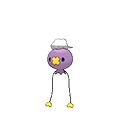

Voulez-vous une autre image? (0 pour oui 1 pour non) 1


-----------------------------------------------------------------------
Acuracy:  0.9901234567901235
Feature importance:  [0.24751863 0.         0.         0.25124378 0.         0.17945984
 0.         0.32177775 0.        ]
--> 3  recommendations pour  favorite_utilisateur3  :  ['chatot.png' 'mimikyu.jpg' 'pheromosa.jpg']


Voulez-vous une autre image? (0 pour oui 1 pour non) 1


-----------------------------------------------------------------------
Acuracy:  1.0
Feature importance:  [0.         0.         0.60437284 0.39562716 0.         0.
 0.         0.         0.        ]
--> 24  recommendations pour  favorite_utilisateur4  :  ['riolu.png' 'lucario.png' 'timburr.png' 'gurdurr.png' 'conkeldurr.png'
 'throh.png' 'sawk.png' 'mienfoo.png' 'mienshao.png' 'pancham.png'
 'pangoro.png' 'binacle.png' 'barbaracle.png' 'skrelp.png' 'hawlucha.png'
 'volcanion.png' 'crabrawler.jpg' 'crabominable.jpg' 'mareanie.jpg'
 'toxapex.jpg' 'passimian.jpg' 'wimpod.jpg' 'golisopod.jpg'
 'marshadow.jpg']


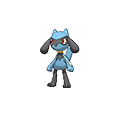

Voulez-vous une autre image? (0 pour oui 1 pour non) 1


In [375]:
#Precision over 80% in most cases)
User_recommendations(dtc,'favorite_utilisateur1')
User_recommendations(dtc2,'favorite_utilisateur2')
User_recommendations(dtc3,'favorite_utilisateur3')
User_recommendations(dtc4,'favorite_utilisateur4')


In [376]:
########### VISUALISATION DES DONNEES ##################

from prettytable import PrettyTable

# Charger le fichier json contenant les informations sur les pokemons
with open('images_info.json', 'r') as f:
    data = json.load(f)

# Créer un tableau pour afficher les résultats
table = PrettyTable()
table.field_names = ['Nom du fichier', 'Nom du Pokemon', 'Type 1', 'Type 2']

# Présentation de tous les types de Pokemon 
list_types = ["Normal", "Fight", "Flying", "Poison", "Ground", "Rock", "Bug", "Ghost", "Steel", "Fire", "Water", "Grass", "Electric", "Psychic", "Ice", "Dragon", "Dark", "Fairy"]

print("Voici tous les types de Pokemon :")
for tp in list_types :
    print(" - "+ tp)

# Demander à l'utilisateur de saisir un type de Pokemon
pokemon_type = input('Entrez un type de Pokemon : ')

# Parcourir les données pour trouver les fichiers correspondants au type de Pokemon

count = 0

for pokemon in data:
    if pokemon['type1'] == pokemon_type or pokemon['type2'] == pokemon_type:
        table.add_row([pokemon['filename'], pokemon['pokemon_name'], pokemon['type1'], pokemon['type2']])
        count+=1

# Afficher le tableau
print(table)
print("Il y a", count, "éléments possédant ce type.")

Voici tous les types de Pokemon :
 - Normal
 - Fight
 - Flying
 - Poison
 - Ground
 - Rock
 - Bug
 - Ghost
 - Steel
 - Fire
 - Water
 - Grass
 - Electric
 - Psychic
 - Ice
 - Dragon
 - Dark
 - Fairy


Entrez un type de Pokemon :  Water


+--------------------------+----------------------+--------+----------+
|      Nom du fichier      |    Nom du Pokemon    | Type 1 |  Type 2  |
+--------------------------+----------------------+--------+----------+
|       squirtle.png       |       squirtle       | Water  |   None   |
|      wartortle.png       |      wartortle       | Water  |   None   |
|      blastoise.png       |      blastoise       | Water  |   None   |
|       psyduck.png        |       psyduck        | Water  |   None   |
|       golduck.png        |       golduck        | Water  |   None   |
|       poliwag.png        |       poliwag        | Water  |   None   |
|      poliwhirl.png       |      poliwhirl       | Water  |   None   |
|      poliwrath.png       |      poliwrath       | Water  | Fighting |
|      tentacool.png       |      tentacool       | Water  |  Poison  |
|      tentacruel.png      |      tentacruel      | Water  |  Poison  |
|       slowpoke.png       |       slowpoke       | Water  | Psy

In [377]:
import json
from webcolors import CSS3_HEX_TO_NAMES, hex_to_rgb

# Charger le fichier json contenant les informations sur les pokemons
with open('images_info.json', 'r') as f:
    data = json.load(f)

# Récupérer les noms des champs de couleurs
color_columns = [col for col in data[0] if col.startswith('k-means_region_')]

# Créer une liste de tous les noms de couleurs valides
color_names = list(CSS3_HEX_TO_NAMES.values())

# Afficher les noms de couleurs disponibles à l'utilisateur
print("Les couleurs disponibles sont :")
for color_name in color_names:
    print(color_name)

# Demander à l'utilisateur de saisir une couleur
color_name = input("Entrez le nom d'une couleur : ")

# Vérifier si la couleur est valide
if color_name.lower() not in color_names:
    print(f"Erreur : la couleur '{color_name}' n'est pas valide.")
else:
    # Vérifier si la couleur est présente dans les colonnes du JSON
    matching_files = []
    for item in data:
        for col in color_columns:
            if color_name.lower() in item.get(col, '').lower():
                matching_files.append(item)
                break

    # Afficher les résultats sous forme de tableau
    
    count = 0
    
    if matching_files:
        table = PrettyTable()
        table.field_names = ["filename", "pokemon_name", "type1", "type2", "size", "k-means_region_one", "k-means_region_two", "k-means_region_three", "k-means_region_four"]
        for item in matching_files:
            table.add_row([item['filename'], item['pokemon_name'], item['type1'], item['type2'], item['size'], item['k-means_region_one'], item['k-means_region_two'], item['k-means_region_three'], item['k-means_region_four']])
            
            count += 1
        print(table)
        print("Il y a", count, "éléments possédant cette couleur.")
    else:
        print(f"Aucun fichier n'a la couleur {color_name}.")


Les couleurs disponibles sont :
aliceblue
antiquewhite
cyan
aquamarine
azure
beige
bisque
black
blanchedalmond
blue
blueviolet
brown
burlywood
cadetblue
chartreuse
chocolate
coral
cornflowerblue
cornsilk
crimson
darkblue
darkcyan
darkgoldenrod
darkgray
darkgreen
darkkhaki
darkmagenta
darkolivegreen
darkorange
darkorchid
darkred
darksalmon
darkseagreen
darkslateblue
darkslategray
darkturquoise
darkviolet
deeppink
deepskyblue
dimgray
dodgerblue
firebrick
floralwhite
forestgreen
magenta
gainsboro
ghostwhite
gold
goldenrod
gray
green
greenyellow
honeydew
hotpink
indianred
indigo
ivory
khaki
lavender
lavenderblush
lawngreen
lemonchiffon
lightblue
lightcoral
lightcyan
lightgoldenrodyellow
lightgray
lightgreen
lightpink
lightsalmon
lightseagreen
lightskyblue
lightslategray
lightsteelblue
lightyellow
lime
limegreen
linen
maroon
mediumaquamarine
mediumblue
mediumorchid
mediumpurple
mediumseagreen
mediumslateblue
mediumspringgreen
mediumturquoise
mediumvioletred
midnightblue
mintcream
mistyrose


Entrez le nom d'une couleur :  salmon


+------------------------+--------------------+----------+----------+------+--------------------+--------------------+----------------------+---------------------+
|        filename        |    pokemon_name    |  type1   |  type2   | size | k-means_region_one | k-means_region_two | k-means_region_three | k-means_region_four |
+------------------------+--------------------+----------+----------+------+--------------------+--------------------+----------------------+---------------------+
|     charmander.png     |     charmander     |   Fire   |   None   | 2311 |   blanchedalmond   |     aquamarine     |      darksalmon      |     mediumpurple    |
|     blastoise.png      |     blastoise      |  Water   |   None   | 5311 |      skyblue       |     darksalmon     |        beige         |      steelblue      |
|      venonat.png       |      venonat       |   Bug    |  Poison  | 2380 |       salmon       |   cornflowerblue   |       dimgray        |      palegreen      |
|     growlithe.

In [271]:
import json
from webcolors import CSS3_HEX_TO_NAMES, hex_to_rgb
from prettytable import PrettyTable

# Charger le fichier json contenant les informations sur les pokemons
with open('images_info.json', 'r') as f:
    data = json.load(f)

# Récupérer les noms des champs de couleurs
color_columns = [col for col in data[0] if col.startswith('k-means_region_')]

# Créer une liste de tous les noms de couleurs valides
color_names = list(CSS3_HEX_TO_NAMES.values())

# Demander à l'utilisateur de saisir une couleur
color_name = input("Entrez le nom d'une couleur : ")

# Présentation de tous les types de Pokemon 
list_types = ["Normal", "Fight", "Flying", "Poison", "Ground", "Rock", "Bug", "Ghost", "Steel", "Fire", "Water", "Grass", "Electric", "Psychic", "Ice", "Dragon", "Dark", "Fairy"]

print("Voici tous les types de Pokemon :")
for tp in list_types :
    print(" - "+ tp)

# Vérifier si la couleur est valide
if color_name.lower() not in color_names:
    print(f"Erreur : la couleur '{color_name}' n'est pas valide.")
else:
    # Demander à l'utilisateur de saisir un type de Pokemon
    pokemon_type = input('Entrez un type de Pokemon : ')

    # Créer un tableau pour afficher les résultats
    table = PrettyTable()
    table.field_names = ["filename", "pokemon_name", "type1", "type2", "size", "k-means_region_one", "k-means_region_two", "k-means_region_three", "k-means_region_four"]

    # Parcourir les données pour trouver les fichiers correspondants au type de Pokemon et à la couleur sélectionnée
    matching_files = []
    for item in data:
        if (color_name.lower() in item.get(color_columns[0], '').lower() or
            color_name.lower() in item.get(color_columns[1], '').lower() or
            color_name.lower() in item.get(color_columns[2], '').lower() or
            color_name.lower() in item.get(color_columns[3], '').lower()) and \
           (item['type1'] == pokemon_type or item['type2'] == pokemon_type):
            matching_files.append(item)
    
    #Compteur permettant de compter le nombre d'éléments possédant ce type et cette couleur
    count = 0
    
    # Afficher les résultats sous forme de tableau
    if matching_files:
        for item in matching_files:
            table.add_row([item['filename'], item['pokemon_name'], item['type1'], item['type2'], item['size'], item['k-means_region_one'], item['k-means_region_two'], item['k-means_region_three'], item['k-means_region_four']])
            count += 1
        print(table)
        print("Il y a", count,  "éléments possédant cette couleur et ce type.")
    else:
        print(f"Aucun fichier n'a la couleur {color_name} et le type de Pokemon {pokemon_type}.")


Entrez le nom d'une couleur :  blue


Voici tous les types de Pokemon :
 - Normal
 - Fight
 - Flying
 - Poison
 - Ground
 - Rock
 - Bug
 - Ghost
 - Steel
 - Fire
 - Water
 - Grass
 - Electric
 - Psychic
 - Ice
 - Dragon
 - Dark
 - Fairy


Entrez un type de Pokemon :  Fire


+-------------------------+---------------------+---------+----------+------+--------------------+--------------------+----------------------+---------------------+
|         filename        |     pokemon_name    |  type1  |  type2   | size | k-means_region_one | k-means_region_two | k-means_region_three | k-means_region_four |
+-------------------------+---------------------+---------+----------+------+--------------------+--------------------+----------------------+---------------------+
|      charmeleon.png     |      charmeleon     |   Fire  |   None   | 3055 |       bisque       |     sandybrown     |      turquoise       |   mediumslateblue   |
|      charizard.png      |      charizard      |   Fire  |  Flying  | 4980 |        peru        |  mediumslateblue   |     antiquewhite     |   mediumturquoise   |
|        vulpix.png       |        vulpix       |   Fire  |   None   | 2196 |       silver       |   lightslategray   |         peru         |     midnightblue    |
|      gro

/tmp/ipykernel_16052/3292731325.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(pokemon_count.keys(), rotation=45, ha='right')


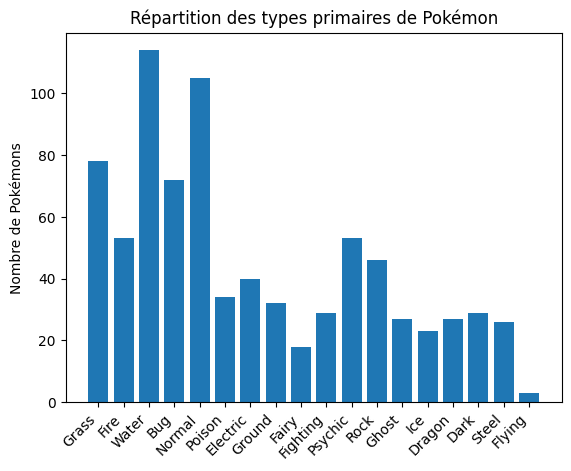

In [378]:
import json
import matplotlib.pyplot as plt

# Charger le fichier json contenant les informations sur les pokemons
with open('images_info.json', 'r') as f:
    data = json.load(f)

# Créer un dictionnaire pour stocker le nombre de pokemons pour chaque type
pokemon_count = {}

# Parcourir les données pour compter le nombre de pokemons pour chaque type
for pokemon in data:
    pokemon_type = pokemon['type1']
    if pokemon_type in pokemon_count:
        pokemon_count[pokemon_type] += 1
    else:
        pokemon_count[pokemon_type] = 1

# Créer un histogramme pour visualiser la répartition des types de Pokémon
fig, ax = plt.subplots()
ax.bar(pokemon_count.keys(), pokemon_count.values())
ax.set_xticklabels(pokemon_count.keys(), rotation=45, ha='right')
ax.set_ylabel('Nombre de Pokémons')
ax.set_title('Répartition des types primaires de Pokémon')
plt.show()

In [379]:
import json
import matplotlib.pyplot as plt

# Charger le fichier json contenant les informations sur les pokemons
with open('images_info.json', 'r') as f:
    data = json.load(f)

# Créer un dictionnaire pour stocker le nombre de pokemons pour chaque type
pokemon_count = {}

# Parcourir les données pour compter le nombre de pokemons pour chaque type
for pokemon in data:
    pokemon_type = pokemon['type2']
    if pokemon_type in pokemon_count:
        pokemon_count[pokemon_type] += 1
    else:
        pokemon_count[pokemon_type] = 1

# Créer un histogramme pour visualiser la répartition des types de Pokémon
fig, ax = plt.subplots()
ax.bar(pokemon_count.keys(), pokemon_count.values())
ax.set_xticklabels(pokemon_count.keys(), rotation=45, ha='right')
ax.set_ylabel('Nombre de Pokémons')
ax.set_title('Répartition des types secondaires de Pokémon')
plt.show()

/tmp/ipykernel_16052/3421650868.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(pokemon_count.keys(), rotation=45, ha='right')


/tmp/ipykernel_16052/1664172690.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


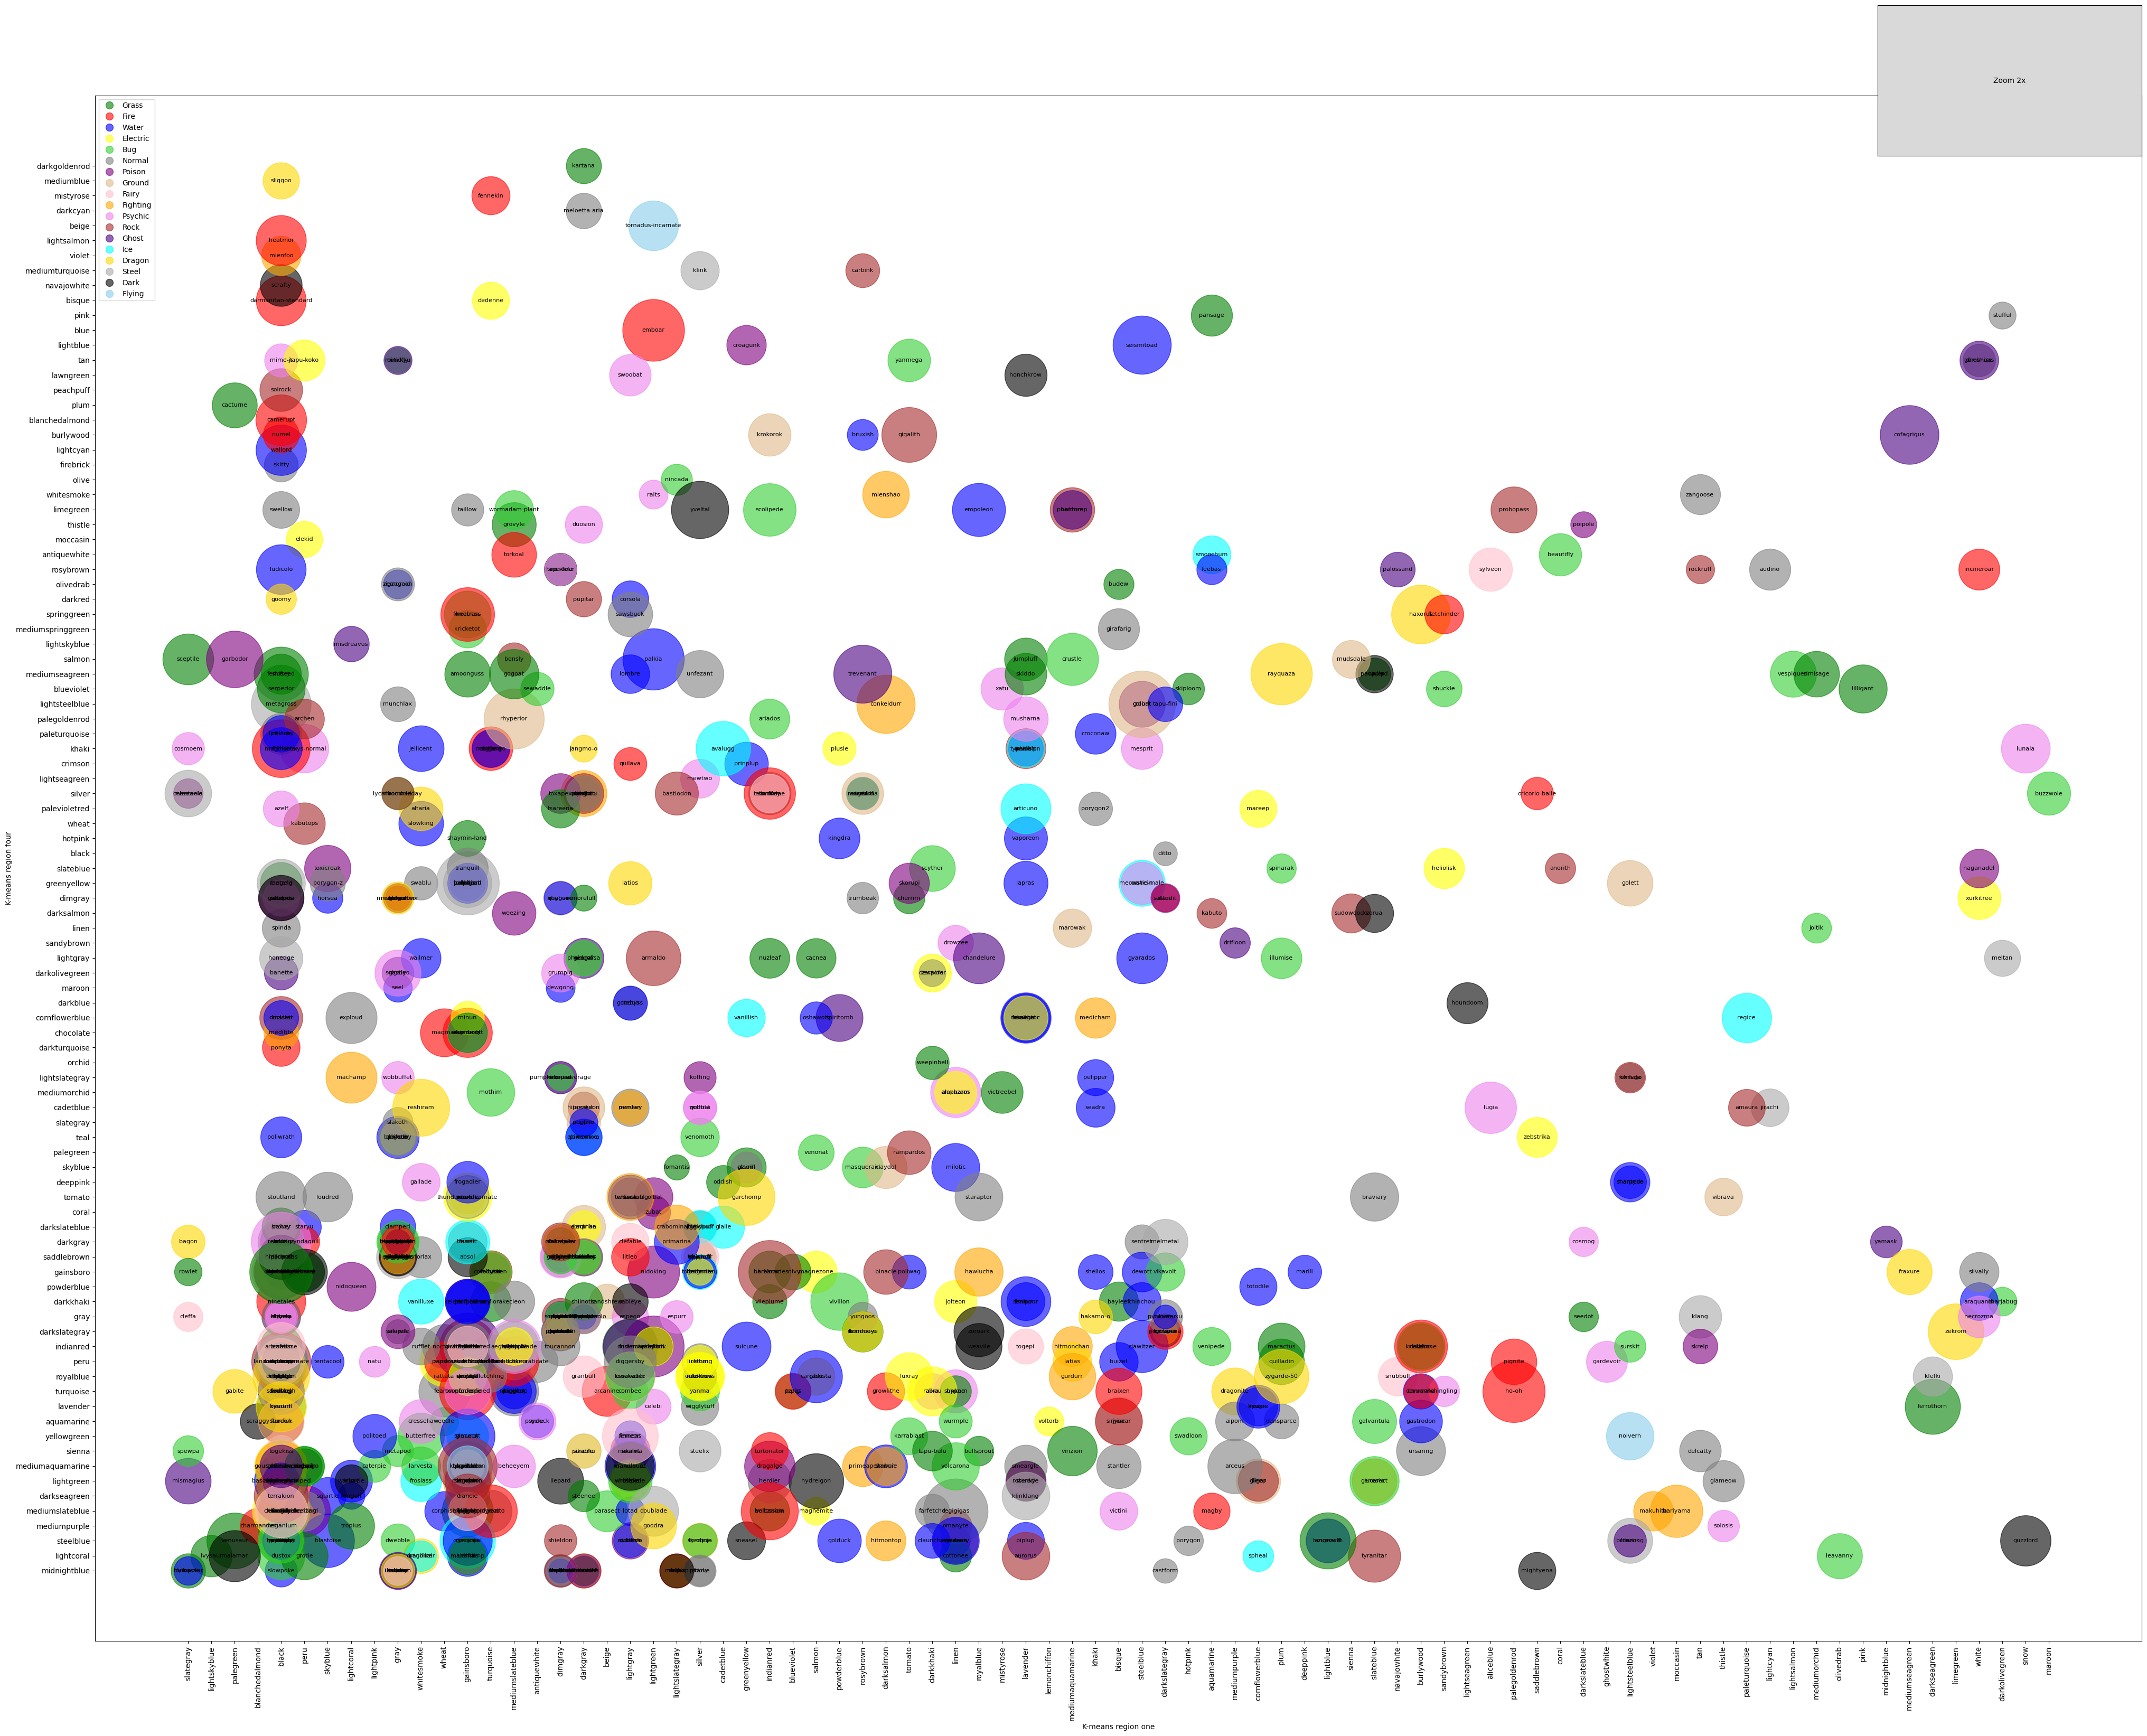

"\nUne carte thermique affichant tous les pokemons en fonction de leurs régions k-means une et quatre, sous la forme de cercle dont la taille dépend de la taille de l'image \n"

In [380]:
import json
import matplotlib.pyplot as plt
from matplotlib.widgets import Button

# Charger les données depuis le fichier JSON
with open('./images_info.json') as f:
    data = json.load(f)

# Créer la figure et les axes
fig, ax = plt.subplots()

# Définir les couleurs pour chaque type de pokemon
colors = {'Grass': 'green', 'Fire': 'red', 'Water': 'blue', 'Electric': 'yellow', 'Bug': 'limegreen', 'Normal': 'gray', 'Poison': 'purple', 'Ground': 'burlywood', 'Fairy': 'pink', 'Fighting': 'orange', 'Psychic': 'violet', 'Rock': 'brown', 'Ghost': 'indigo', 'Ice': 'cyan', 'Dragon': 'gold', 'Steel': 'darkgray', 'Dark': 'black', 'Flying': 'skyblue'}

# Définir les tailles des points en fonction de la taille de l'image
sizes = [int(pokemon['size']) for pokemon in data]
sizes = [size * 10 for size in sizes]

# Parcourir les données
for i, pokemon in enumerate(data):
    # Obtenir la taille du point pour ce pokemon
    size = int(pokemon['size'])
    # Obtenir la couleur du point pour ce pokemon
    color = colors.get(pokemon['type1'], 'gray')
    # Tracer le point pour ce pokemon avec la taille et la couleur appropriées
    ax.scatter(pokemon['k-means_region_one'], pokemon['k-means_region_four'], s=size, c=color, alpha=0.6)
    # Ajouter une étiquette pour ce pokemon
    ax.annotate(pokemon['pokemon_name'], xy=(pokemon['k-means_region_one'], pokemon['k-means_region_four']), ha='center', va='center', fontsize=8)

# Définir les étiquettes des axes
ax.set_xlabel('K-means region one')
ax.set_ylabel('K-means region four')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Ajouter une légende pour les types de pokemon
handles = [plt.plot([],[], marker="o", ms=10, ls="", mec=None, color=color, alpha=0.6)[0] for color in colors.values()]
labels = list(colors.keys())
ax.legend(handles, labels, loc='upper left')

# Ajouter le bouton pour zoomer et dézoomer
class ZoomButton:
    def __init__(self, ax, zoom_func, zoom_level):
        self.ax = ax
        self.zoom_func = zoom_func
        self.zoom_level = zoom_level
        self.button = Button(ax, f'Zoom {zoom_level}x')
        self.button.on_clicked(self.on_clicked)
        
    def on_clicked(self, event):
        self.zoom_func(self.zoom_level)

def on_zoom_in(factor):
    x_limits = ax.get_xlim()
    y_limits = ax.get_ylim()
    x_center = (x_limits[1] + x_limits[0]) / 2
    y_center = (y_limits[1] + y_limits[0]) / 2
    new_x_limits = (x_center - (x_center - x_limits[0]) * factor, x_center + (x_limits[1] - x_center) * factor)
    new_y_limits = (y_center - (y_center - y_limits[0]) * factor, y_center + (y_limits[1] - y_center) * factor)
    ax.set_xlim(new_x_limits)
    ax.set_ylim(new_y_limits)
    plt.draw()

zoom_in_button = ZoomButton(plt.axes([0.8, 0.85, 0.1, 0.075]), on_zoom_in, 2)

# Augmenter la taille de la figure
fig.set_size_inches(50, 38)

# Afficher la figure
plt.show()

"""
Une carte thermique affichant tous les pokemons en fonction de leurs régions k-means une et quatre, sous la forme de cercle dont la taille dépend de la taille de l'image 
"""


/tmp/ipykernel_16052/1752363550.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


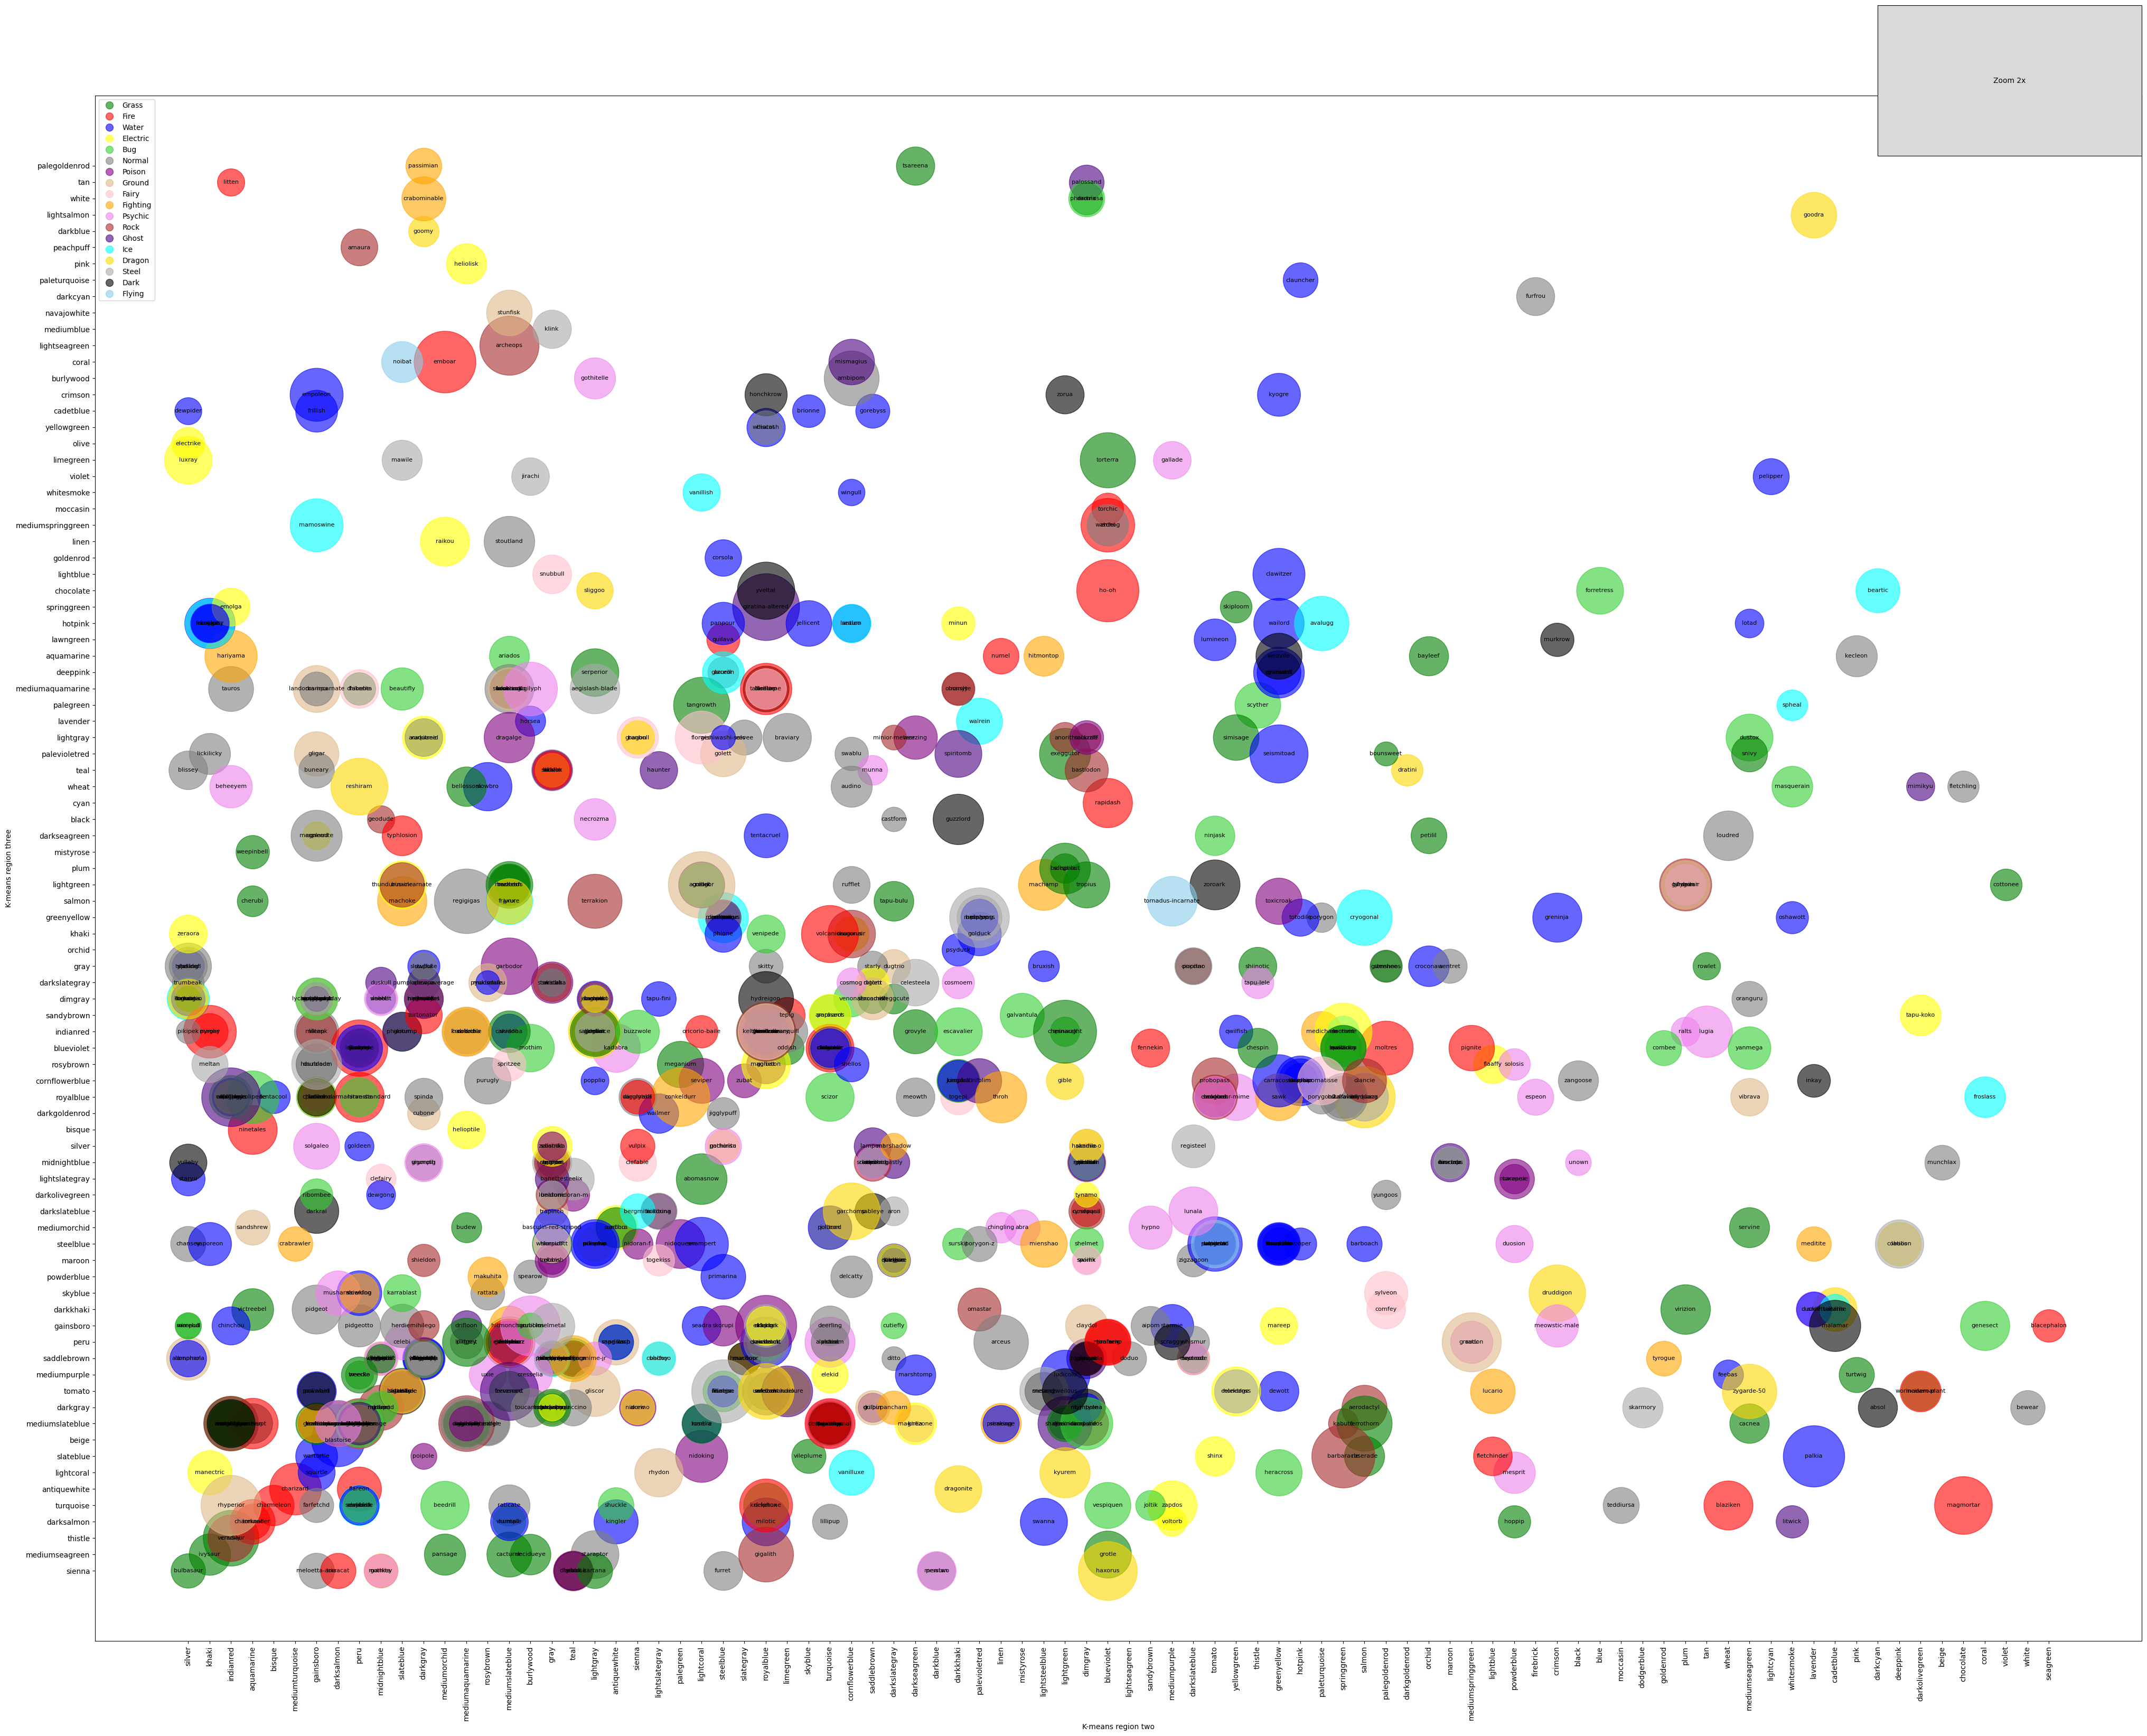

"\nUne carte thermique affichant tous les pokemons en fonction de leurs régions k-means deux et trois, sous la forme de cercle dont la taille dépend de la taille de l'image \n"

In [381]:
import json
import matplotlib.pyplot as plt
from matplotlib.widgets import Button

# Charger les données depuis le fichier JSON
with open('./images_info.json') as f:
    data = json.load(f)

# Créer la figure et les axes
fig, ax = plt.subplots()

# Définir les couleurs pour chaque type de pokemon
colors = {'Grass': 'green', 'Fire': 'red', 'Water': 'blue', 'Electric': 'yellow', 'Bug': 'limegreen', 'Normal': 'gray', 'Poison': 'purple', 'Ground': 'burlywood', 'Fairy': 'pink', 'Fighting': 'orange', 'Psychic': 'violet', 'Rock': 'brown', 'Ghost': 'indigo', 'Ice': 'cyan', 'Dragon': 'gold', 'Steel': 'darkgray', 'Dark': 'black', 'Flying': 'skyblue'}

# Définir les tailles des points en fonction de la taille de l'image
sizes = [int(pokemon['size']) for pokemon in data]
sizes = [size * 10 for size in sizes]

# Parcourir les données
for i, pokemon in enumerate(data):
    # Obtenir la taille du point pour ce pokemon
    size = int(pokemon['size'])
    # Obtenir la couleur du point pour ce pokemon
    color = colors.get(pokemon['type1'], 'gray')
    # Tracer le point pour ce pokemon avec la taille et la couleur appropriées
    ax.scatter(pokemon['k-means_region_two'], pokemon['k-means_region_three'], s=size, c=color, alpha=0.6)
    # Ajouter une étiquette pour ce pokemon
    ax.annotate(pokemon['pokemon_name'], xy=(pokemon['k-means_region_two'], pokemon['k-means_region_three']), ha='center', va='center', fontsize=8)

# Définir les étiquettes des axes
ax.set_xlabel('K-means region two')
ax.set_ylabel('K-means region three')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Ajouter une légende pour les types de pokemon
handles = [plt.plot([],[], marker="o", ms=10, ls="", mec=None, color=color, alpha=0.6)[0] for color in colors.values()]
labels = list(colors.keys())
ax.legend(handles, labels, loc='upper left')

# Ajouter le bouton pour zoomer et dézoomer
class ZoomButton:
    def __init__(self, ax, zoom_func, zoom_level):
        self.ax = ax
        self.zoom_func = zoom_func
        self.zoom_level = zoom_level
        self.button = Button(ax, f'Zoom {zoom_level}x')
        self.button.on_clicked(self.on_clicked)
        
    def on_clicked(self, event):
        self.zoom_func(self.zoom_level)

def on_zoom_in(factor):
    x_limits = ax.get_xlim()
    y_limits = ax.get_ylim()
    x_center = (x_limits[1] + x_limits[0]) / 2
    y_center = (y_limits[1] + y_limits[0]) / 2
    new_x_limits = (x_center - (x_center - x_limits[0]) * factor, x_center + (x_limits[1] - x_center) * factor)
    new_y_limits = (y_center - (y_center - y_limits[0]) * factor, y_center + (y_limits[1] - y_center) * factor)
    ax.set_xlim(new_x_limits)
    ax.set_ylim(new_y_limits)
    plt.draw()

zoom_in_button = ZoomButton(plt.axes([0.8, 0.85, 0.1, 0.075]), on_zoom_in, 2)

# Augmenter la taille de la figure
fig.set_size_inches(50, 38)

# Afficher la figure
plt.show()

"""
Une carte thermique affichant tous les pokemons en fonction de leurs régions k-means deux et trois, sous la forme de cercle dont la taille dépend de la taille de l'image 
"""